In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  1 11:42:39 2021

@author: satyals
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import rcParams

rcParams.update({'font.size': 22})
rcParams.update({'mathtext.fontset': 'cm'})

from google.colab import drive
drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/Colab-Notebooks/Slope-Calculation/'
#print(root_path)

Mounted at /content/gdrive


# New Section

1.4004427604591523 2.110114117548595


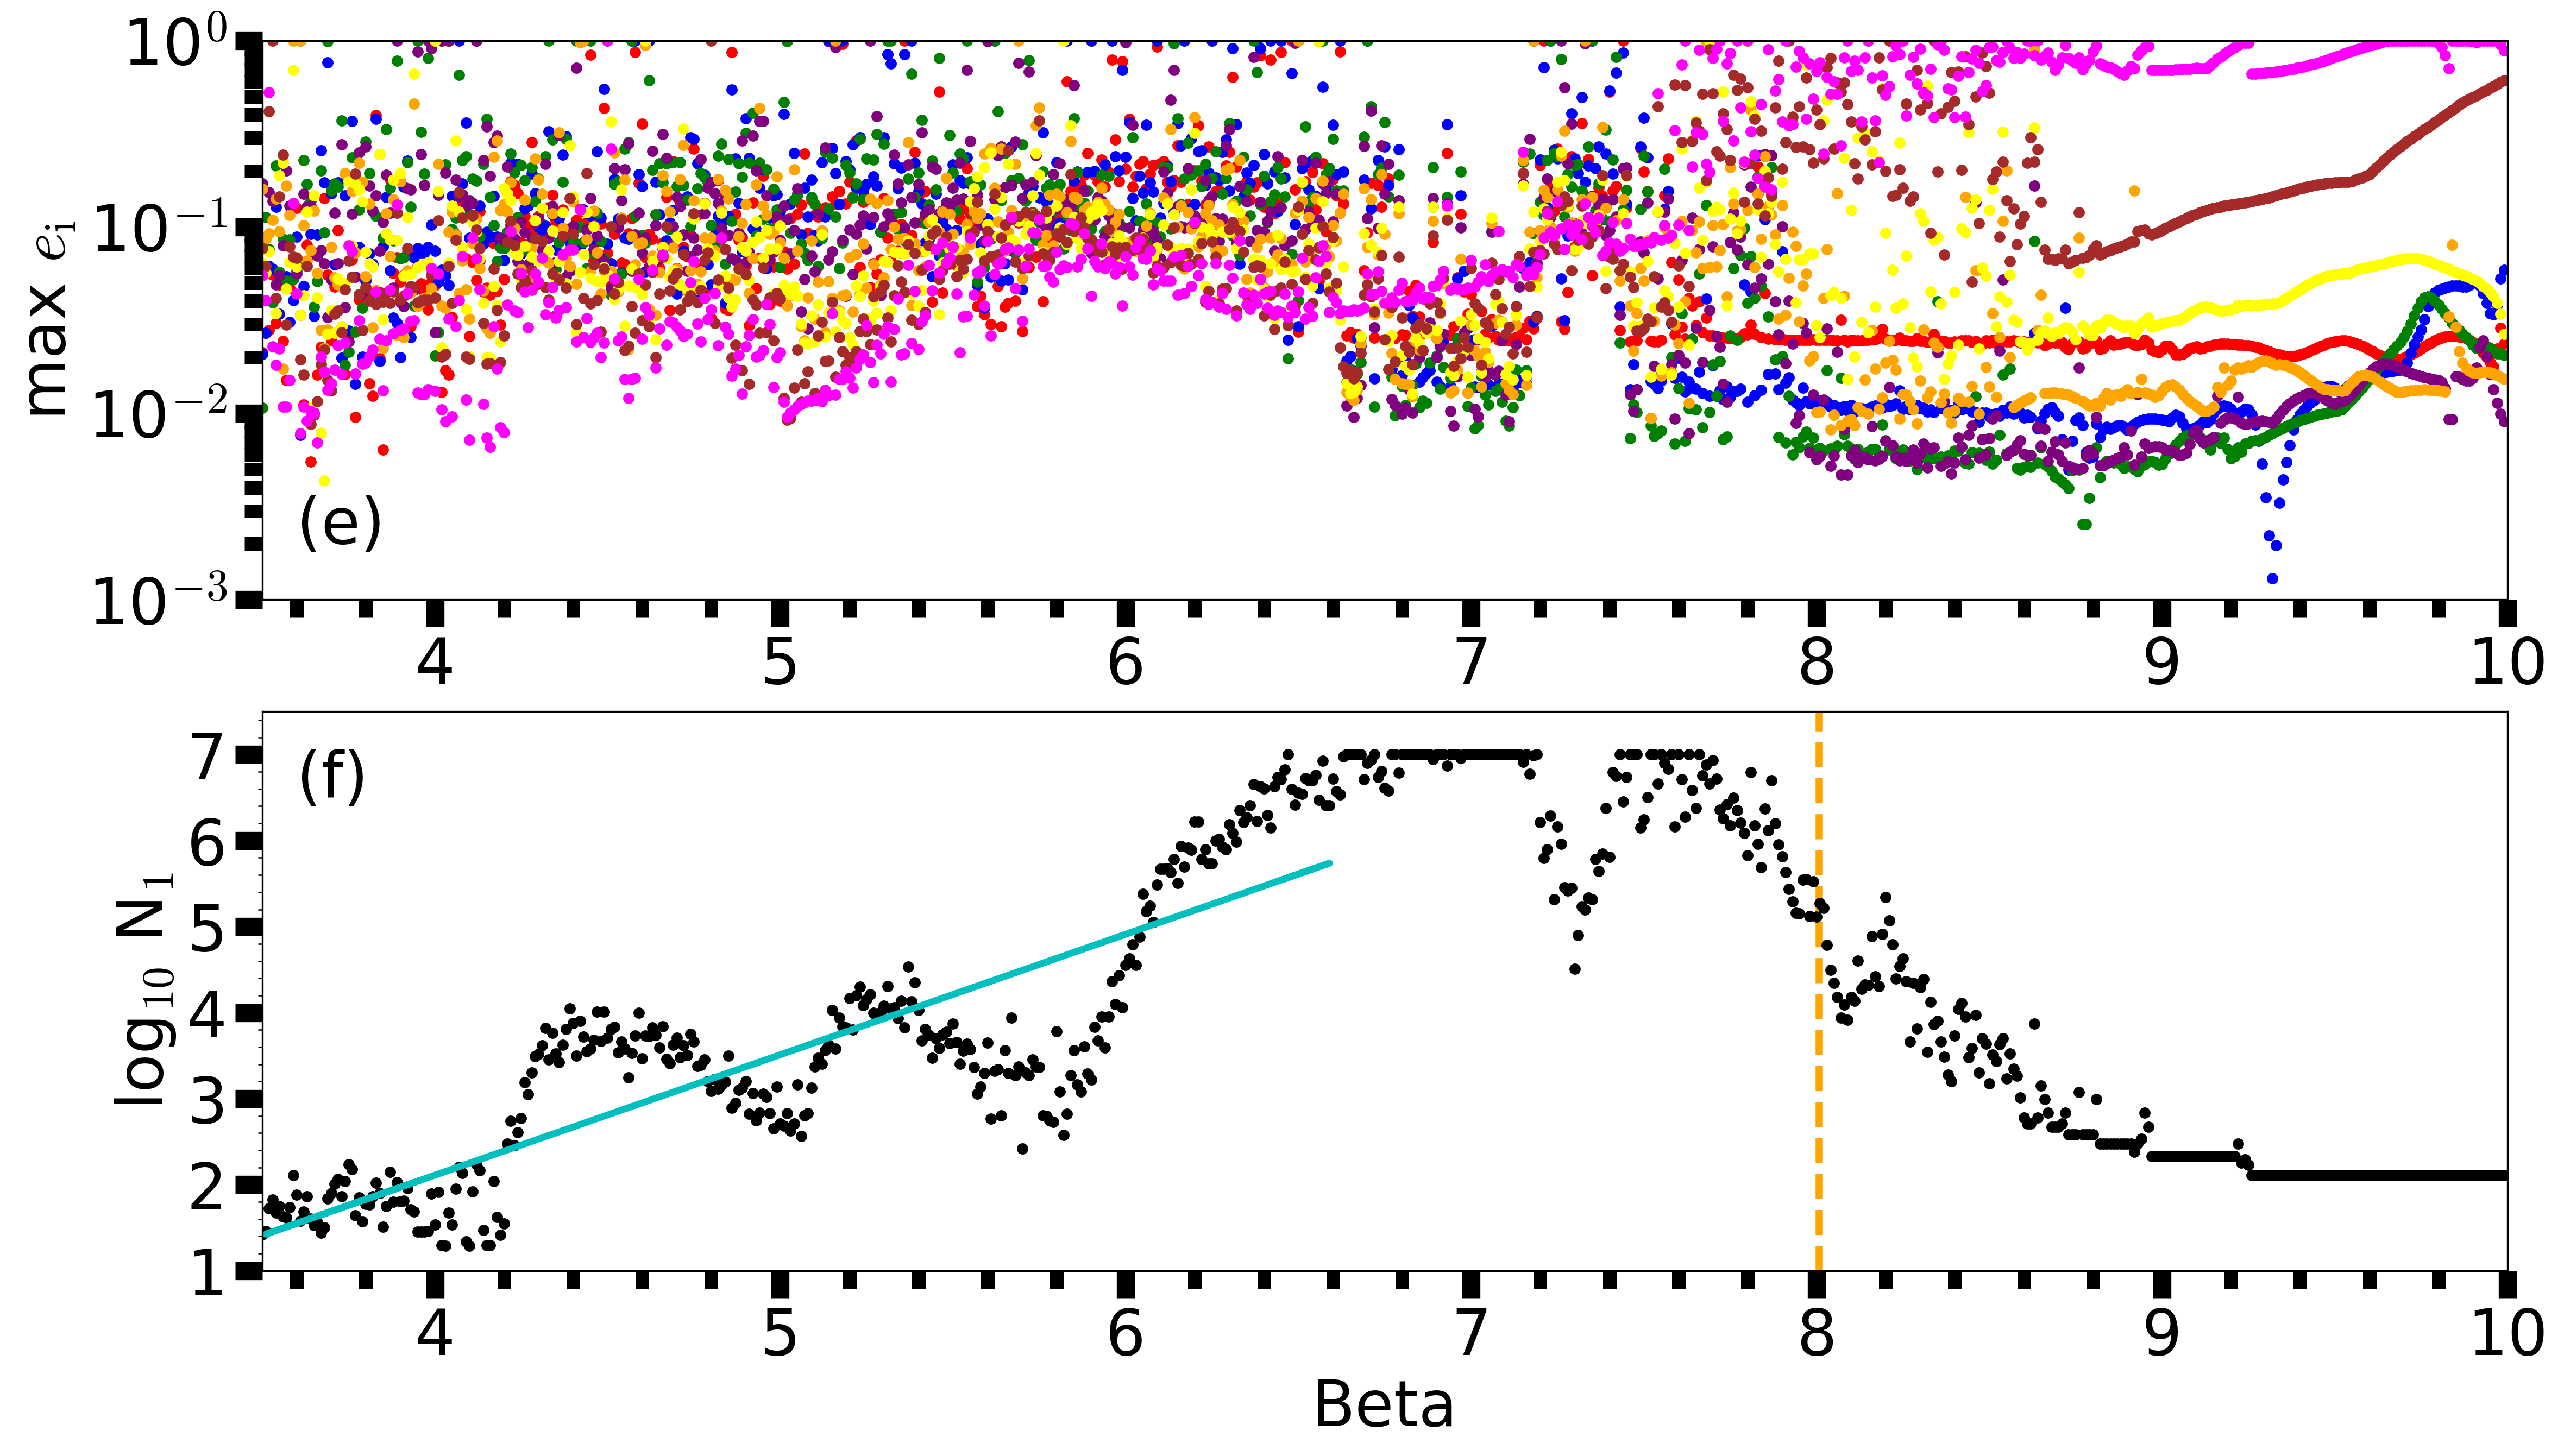

In [17]:
cmap = mpl.colors.ListedColormap(['red','blue','green','purple','orange','yellow','brown','magenta'])
bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#moon_type = sys.argv[1]
moon_type = 'Ceres'

M_star = 1.
M_E = 3.0035e-6
R_E = 4.26352e-5 #Earth radius in AU
if moon_type == 'Ceres':
    M_moon = 0.00015*M_E #Ceres mass
    rho_moon = 2.08
elif moon_type == 'Pluto':
    M_moon = 0.0022*M_E #Pluto mass
    rho_moon = 1.88
elif moon_type == 'Luna':
    M_moon = 1./81.*M_E #Luna mass
    rho_moon = 3.3


def calc_max_beta(n_moons):
    a_p = 0.9999964272390238
    R_H = a_p*((M_E+n_moons*M_moon)/(3.*M_star))**(1./3.) #Hill Radius
    a_n = 0.4*R_H
    R_R = 2.44*R_E*(5.515/rho_moon)**(1./3.)  #Roche limit using a fluid satellite defn
    a_1 = 2.*R_R # twice the Roche radius
    an_a1 = (a_n/a_1)**(1./(n_moons-1.))
    beta = (an_a1-1.)/(an_a1+1.)*(12.*M_E/M_moon)**(1./3.)
    return beta


n_moons = 8
data = np.genfromtxt("/content/gdrive/MyDrive/Colab-Notebooks/Slopes-Calculation/Ceres8.txt", delimiter=',',comments='#')
#data1 = np.genfromtxt("/content/forBlessthan6.txt", delimiter=',',comments='#')

X = data[:,0]
Y = data[:,2]

#X1 = data1[:,0]
#Y1 = data1[:,2]

#Y1_log = data1[:,2]
#Y1 = np.log10(Y1_log)

data[data[:,2]==0,2] = 0.0001
#data = data[np.log10(data[:,2])<=7,:]
#stab = np.where(np.log10(data[:,2])>=7)[0]

#unstab = np.where(np.log10(data[:,2])<7)[0]
#data = data[unstab,:]
beta = data[:,0]
n_orbs = data[:,2]
ncols = len(data[0,:])

#np.where(np.logical_and(np.log10(data[:,2]<7,beta<6.5))[0]

unstab= np.where(np.logical_and(beta<6.6,beta>3.5))[0]
                 
aspect = 16./9.
width = 10.
ms = 8
lw = 3
fs = 28

fig = plt.figure(1,figsize=(aspect*width,width),dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


for i in range(3,ncols):
    ax1.plot(beta,data[:,i],'.',color=cmap(norm(i-2)),ms=ms)
    
ax1.set_xlim(3.5,10)
ax1.set_ylim(0.001,1)
ax1.set_yscale('log')
ax1.set_yticks([0.001,0.01,0.1,1.0])
ax1.set_yticklabels(['10$^{-3}$','10$^{-2}$','10$^{-1}$','10$^{0}$'])                       
ax1.set_ylabel("max $e_{\\rm i}$",fontsize=fs)
#ax1.set_xlabel("Beta", fontsize=fs)

ax1.minorticks_on()
ax1.tick_params(which='major',axis='both', direction='out',length = 12.0, width = 8.0,labelsize=fs)
ax1.tick_params(which='minor',axis='both', direction='out',length = 8.0, width = 6.0)

#cax = fig.add_axes([0.12,0.11,0.015,0.77])

#cax = fig.add_axes([0.15,0.9,0.25,0.05])
'''
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=cax,
    #boundaries=[0] + bounds + [10],  # Adding values for extensions.
    extend='neither',
    #ticks=([1.5,2.5,3.5]),
    ticks=([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]),
    #ticklabels=([1,2,3]),
    spacing='proportional',
    orientation='horizontal',
    #label='Moon Index $i$',
)
'''
#color_label='Moon Index $i$'
#cbar.set_label(color_label,fontsize=fs,labelpad=-25, x = 1.54)

#cbar.ax.set_xticklabels(['1', '2', '3'])
#cbar.ax.set_xticklabels(['1','2','3','4','5','6','7','8'])

#cbar.ax.xaxis.set_ticks_position("top")

ax1.text(3.6,0.002,'(e)',fontsize=fs)
ax2.text(3.6,6.5,'(f)',fontsize=fs)

#plot stability times (number of orbits) vs. beta
max_beta = calc_max_beta(n_moons)
#print(max_beta)
if max_beta < 10.:
    ax2.axvline(max_beta,linestyle='--',color='orange',lw=lw)
  
ax2.plot(beta,np.log10(n_orbs),'k.',ms=ms)

X = X[unstab]
Y=np.log10(Y[unstab])
X-= 4 #2*np.sqrt(3)
m,b = np.polyfit(X,Y,1)
print(m,b)
#ax2.plot(X+2*np.sqrt(3),m*X+b, 'c',linewidth=3)
ax2.plot(X+4,m*X+b, 'c',linewidth=3)
ax2.set_ylabel("log$_{10}$ N$_1$",fontsize=fs)
ax2.set_xlabel("Beta", fontsize=fs)

ax2.set_ylim(1,7.5)
ax2.set_yticks(np.arange(1,8,1))
ax2.set_xlim(3.5,10)

ax2.minorticks_on()
ax2.tick_params(which='major',axis='both', direction='out',length = 12.0, width = 8.0,labelsize=fs)
ax2.tick_params(which='minor',axis='x', direction='out',length = 8.0, width = 6.0)

fig.subplots_adjust(hspace=0.2)

fig.savefig("/content/gdrive/MyDrive/Colab-Notebooks/Slopes-Calculation/Ceres[8].png",bbox_inches='tight',dpi=300)
#plt.close()



# New Section